In [1]:
import numpy as np

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [2]:
# Plotting parameters
# rc('text', usetex=False)
small_size = 15
medium_size = 25
bigger_size = 30
plt.rc('font', size=small_size)          # controls default text sizes
plt.rc('axes', titlesize=small_size)    # fontsize of the axes title
plt.rc('axes', labelsize=small_size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=small_size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=small_size)    # fontsize of the tick labels
plt.rc('legend', fontsize=small_size)    # legend fontsize
plt.rc('figure', titlesize=small_size)  # fontsize of the figure title
plt.rc('text', usetex = False)

# Site locations

In [3]:
sites = ['US-Bi1', 'US-Hn1', 'US-Me2', 'US-Whs']
locs = [[-121.49933, 38.0991538], [-119.275, 46.4089], 
        [-121.5574, 44.4523], [-110.0522, 31.7438]]
lons = np.array([l[0] for l in locs])
lats = np.array([l[1] for l in locs])


# Plot

http://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/export?bbox=-125.00000000000001,29.000000000000004,-105.00000000000001,48.00000000000001&bboxSR=4326&imageSR=4326&size=1000,950&dpi=96&format=png32&transparent=true&f=image


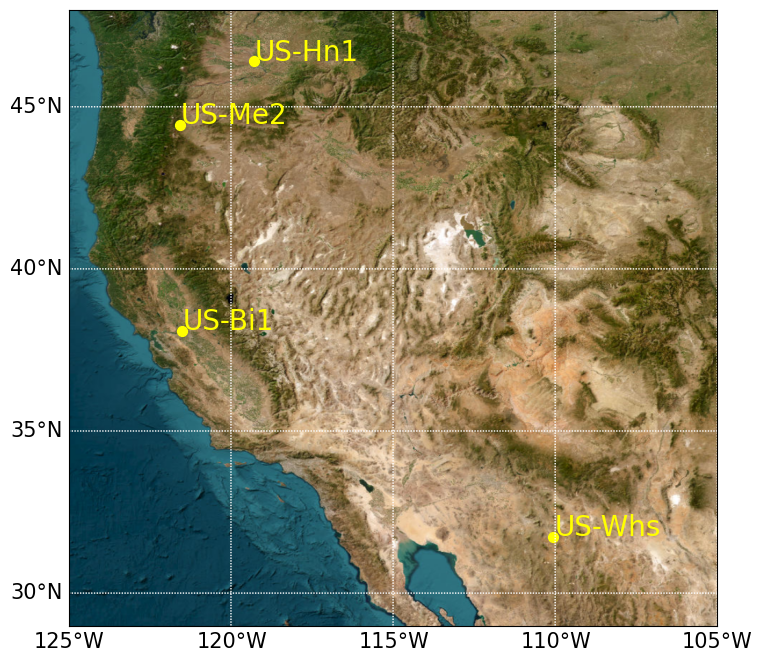

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
# m = Basemap(ax=ax,width=2000000,height=2500000,projection='lcc',
#             resolution='h',lat_0=41., lon_0=-115.)
m = Basemap(llcrnrlon=-125,llcrnrlat=29,urcrnrlon=-105,urcrnrlat=48, epsg=4326)
x, y = m(lons,lats)
# m.bluemarble(scale=4)
# m.drawlsmask()
# m.drawrivers()
m.arcgisimage(service='World_Imagery', xpixels=1000, verbose= True)
m.drawparallels(np.arange(-90.,91.,5.), color='white', labels=[1,0,0,0])  # Parallels with labels
m.drawmeridians(np.arange(-180.,181.,5.), color='white', labels=[0,0,0,1]);  # Meridians with labels
m.scatter(x, y, marker='o', color='yellow', s=50)
for site, xpt, ypt in zip(sites, x, y):
    ax.text(xpt+0.02, ypt+0.02, site, color='yellow', fontsize=20)  # Add label with small offset
plt.savefig('./site_map.png', dpi=300)
